In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Dataset/Business/Entrenamieto_ECI_2020.csv", parse_dates = ["Opportunity_Created_Date"])
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [3]:
df["Stage"].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [4]:
# Voy a tomar solo los casos ganados y perdidos ya que me parecen
# de mayor interés y son más del 99% de los datos
df = df[(df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")]

In [5]:
# Voy a analizar los casos pagados en dólares
dfDolares = df[df["Total_Amount_Currency"] == "USD"]

In [ ]:
# Hago un log para apreciar mejor el resultado ya que los valores son
# significativamente elevados. Al hacer el log se generar algunos NaN,
# los elimino con el dropna()
dfDolares["log_total"] = dfDolares["Total_Amount"].transform(lambda x: np.log10(x))
dfDolares.dropna(subset = ["log_total"], inplace = True)

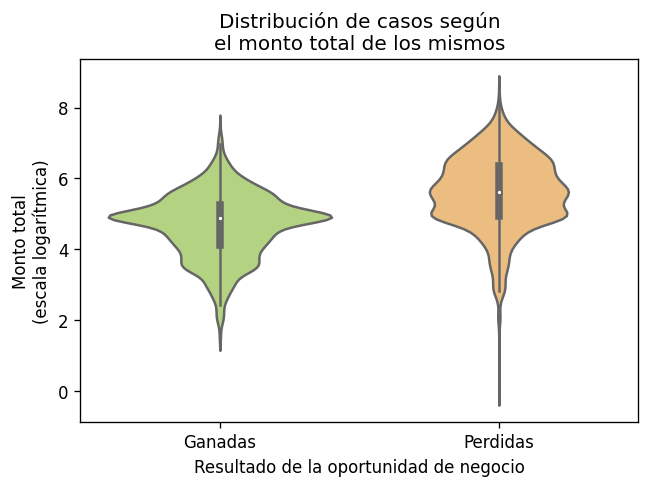

In [7]:
plt.subplots(dpi = 120)

violin = sns.violinplot(data = dfDolares[dfDolares["log_total"] >= 0],
                        x = "Stage", y = "log_total",
                        palette = "RdYlGn_r")
violin.set(xticklabels = ["Ganadas", "Perdidas"],
           xlabel = "Resultado de la oportunidad de negocio",
           ylabel = "Monto total\n(escala logarítmica)",
           title = "Distribución de casos según\nel monto total de los mismos")

plt.show()

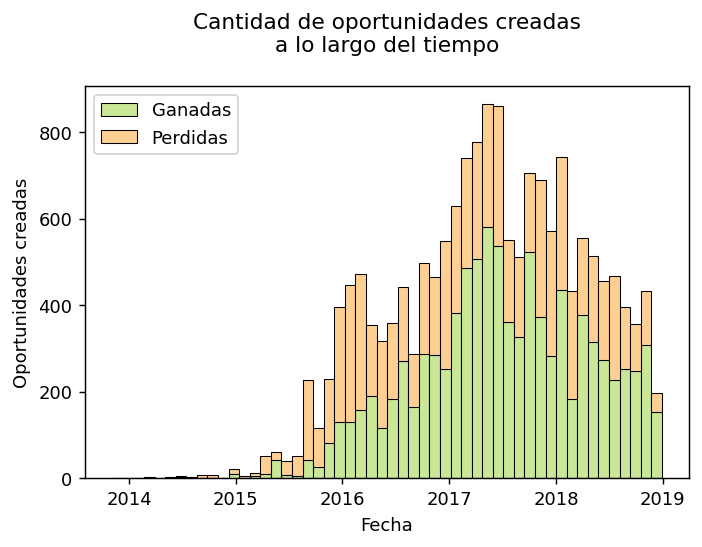

In [8]:
plt.subplots(dpi = 130)

hist = sns.histplot(data = df, x = "Opportunity_Created_Date",
                    hue = "Stage", multiple = "stack", palette = "RdYlGn")
hist.set(xlabel = "Fecha", ylabel = "Oportunidades creadas",
         title = "Cantidad de oportunidades creadas\na lo largo del tiempo\n")

plt.legend(labels = ["Ganadas", "Perdidas"], loc = "upper left")

plt.show()